# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
# dataDir = "/Users/zarifikram/Documents/Repos/drone-dataset-tools/data/ind"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"
# dataDir = "G:AV datasets/inD-dataset-v1.0/data"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")
from joblib import Parallel, delayed
from extractors.loader import Loader
from extractors.LocationData import LocationData

In [5]:
loader = Loader(dataDir, 'inD')
loader.locationToRecordingIds

{4: [0, 1, 2, 3, 4, 5, 6],
 1: [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 2: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 3: [30, 31, 32]}

# Step 1: Load all the location data, downsample them, extract SceneData and save location data


In [ ]:
# No Job Lib Version
# locations = [1, 2, 3, 4]
# locDataList = []

# for loc in locations:
#     locData = loader.getLocationData(loc, useSceneConfigToExtract=True, downSampleFps=10)
#     locData.save("../data") # whole thing as a dill object
    # locDataList.append(locData)

In [ ]:
# Job lib version
# locations = [1, 2, 3, 4]
# locDataList = Parallel(n_jobs=4)(
#         delayed(loader.getLocationData)(loc, useSceneConfigToExtract=True, downSampleFps=10) for loc in locations
# )
# for locData in locDataList:
#     locData.save("../data")

# Step 2: Clip Trajectories, find fast pedestrians, build local trajectories

In [6]:
# we can also load loc data using this: 
locDataList = [
    LocationData.load("../data/location-1", "2023-05-04-fps-10-all.dill"),
    LocationData.load("../data/location-2", "2023-05-04-fps-10-all.dill"),
    LocationData.load("../data/location-3", "2023-05-04-fps-10-all.dill"),
    LocationData.load("../data/location-4", "2023-05-04-fps-10-all.dill")
]
# for locDataFromFile in locDataList:
#     locDataFromFile.buildLocalInformationForScenes()
    

In [ ]:
# Job lib version
# _ = Parallel(n_jobs=4)(
#         delayed(locData.buildLocalInformationForScenes)() for locData in locDataList
# )

### Step 3. Save everything

In [ ]:
# for locData in locDataList:
#     locData.saveCrossingDf("../data")
#     locData.saveSceneDataOnly("../data")
#     locData.save("../data") # whole thing as a dill object

## Step 4: Analyze problem tracks

In [7]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

In [ ]:
for locData in locDataList:
    sceneIds = locData.getSceneIds()
    # print(sceneIds)
    if locData.locationId == 2:
        sceneIds.remove('140') # somethig is fishy
        
    # print(sceneIds)
    for sceneId in sceneIds:
        
        sceneData = locData.getSceneData(sceneId) # loads precomputed
#         print("scene id", sceneId)
#         print(sceneData.warnings)
#         print(sceneData.problematicIds)
        visualizer.showSceneProblems(sceneData)

In [ ]:
pedDf.describe()

In [8]:
loc2Data = locDataList[1]
loc2Data.locationId

2

In [ ]:
sceneData= loc2Data.getSceneData(240)
sceneData.buildLocalInformation(loc2Data.transformer, loc2Data.cleaner, force=True)
# pedDf = scene210.getPedDataInSceneCoordinates()
# pedDf.describe()

INFO:root:SceneData 240: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:getOutliersBySpeed: using range (0.0, 3.0)
INFO:root:Scene 240: clipping original data
clipping ped trajectories for scene # 240 with width offset 4.0: 100%|███████████████| 185/185 [00:12<00:00, 14.46it/s]
clipping other trajectories for scene # 240: 100%|█████████████████████████████████| 1167/1167 [01:09<00:00, 16.68it/s]
INFO:root:Scene 240: transforming trajectories to scene coordinates


In [ ]:
sceneData.problematicIds

In [ ]:
sceneData.warnings

In [12]:
loc2Data.cleaner.maxSpeed

3.0

In [51]:
sceneData._clipPed(crossingOffset = sceneData.CROSSING_CLIP_OFFSET_BEFORE_DYNAMICS, onFull=True, ids=[27530]) 
print(len(sceneData._clippedPedData[sceneData._clippedPedData["uniqueTrackId"] == 27530001]))
# print(len(sceneData._clippedPedData))
# print(sceneData._clippedPedData["uniqueTrackId"].unique())

clipping ped trajectories for scene # 240 with width offset 4.0: 100%|███████████████████| 1/1 [00:00<00:00, 11.90it/s]

759
2
133


In [52]:
sceneData._clippedPedData[sceneData._clippedPedData["uniqueTrackId"] == 27530001]

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth,speed
27,622667,27,530,29650,408,44.81865,-11.35984,243.39499,0.0,0.0,-0.21527,-0.53741,-0.17892,-0.48189,27530001,240,6.0,0.304438
28,622668,27,530,29652,410,44.80008,-11.40561,243.497,0.0,0.0,-0.22819,-0.58151,-0.15996,-0.43499,27530001,240,6.0,0.322709
29,622669,27,530,29654,412,44.78085,-11.45451,243.58074,0.0,0.0,-0.23917,-0.62092,-0.14301,-0.37839,27530001,240,6.0,0.338237
30,622670,27,530,29656,414,44.7607,-11.50669,243.64519,0.0,0.0,-0.24844,-0.65476,-0.12869,-0.31332,27530001,240,6.0,0.351347
31,622671,27,530,29658,416,44.73956,-11.56193,243.68969,0.0,0.0,-0.25592,-0.68186,-0.11792,-0.24161,27530001,240,6.0,0.361926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,622795,27,530,29906,664,38.67336,-18.94127,223.14149,0.0,0.0,-0.6773,-0.63282,0.09009,-0.02034,27530001,240,6.0,0.957847
156,622796,27,530,29908,666,38.62149,-18.98988,223.3394,0.0,0.0,-0.66592,-0.63285,0.04225,-0.06358,27530001,240,6.0,0.941753
157,622797,27,530,29910,668,38.57109,-19.03878,223.53761,0.0,0.0,-0.66048,-0.63794,-0.01223,-0.10949,27530001,240,6.0,0.934060
158,622798,27,530,29912,670,38.52254,-19.08773,223.73453,0.0,0.0,-0.66258,-0.64857,-0.06937,-0.15541,27530001,240,6.0,0.937030


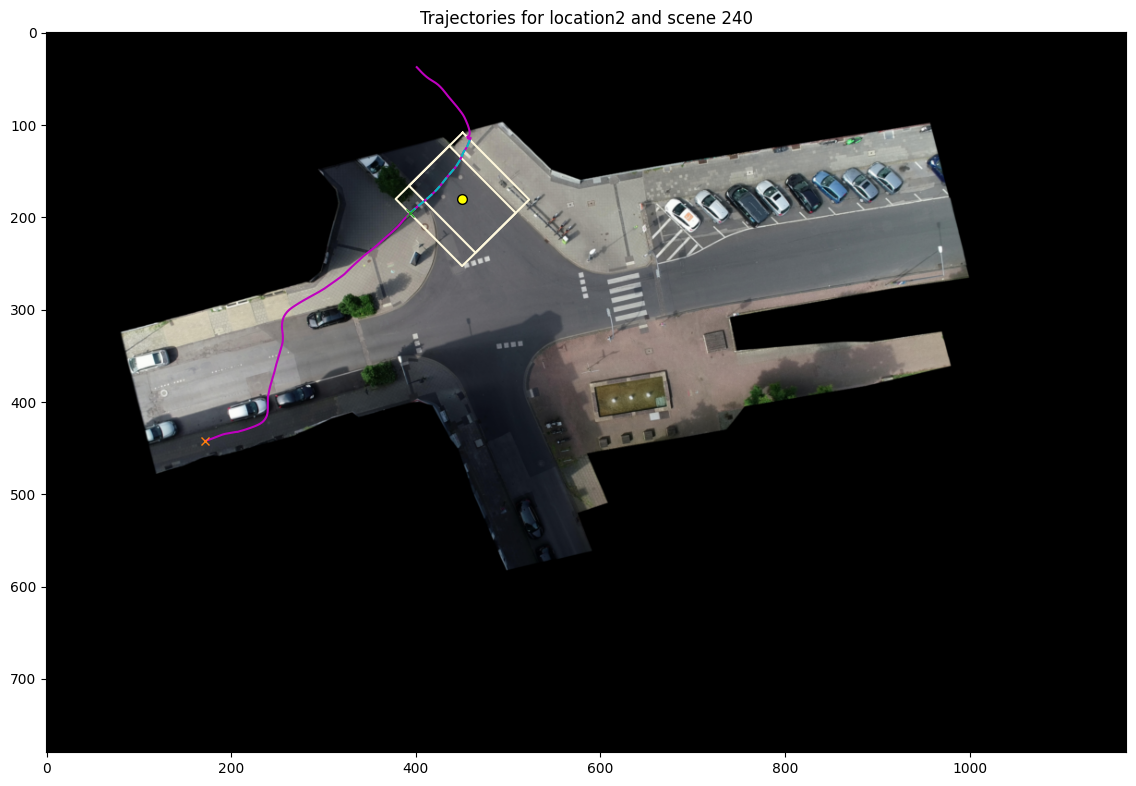

In [55]:

visualizer.showLocationSceneData(sceneData, onlyClipped=False, showOthers=False, ids=[27530001])

In [49]:
pedDf = sceneData.getPedDfByUniqueTrackId(27530001)
pedDf

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth,speed


In [56]:

sceneData._clipPed(crossingOffset = sceneData.CROSSING_CLIP_OFFSET_AFTER_DYNAMICS, onFull=False, ids=[27530001]) 

clipping ped trajectories for scene # 240 with width offset 0.0: 100%|███████████████████| 1/1 [00:00<00:00, 47.62it/s]

133
1


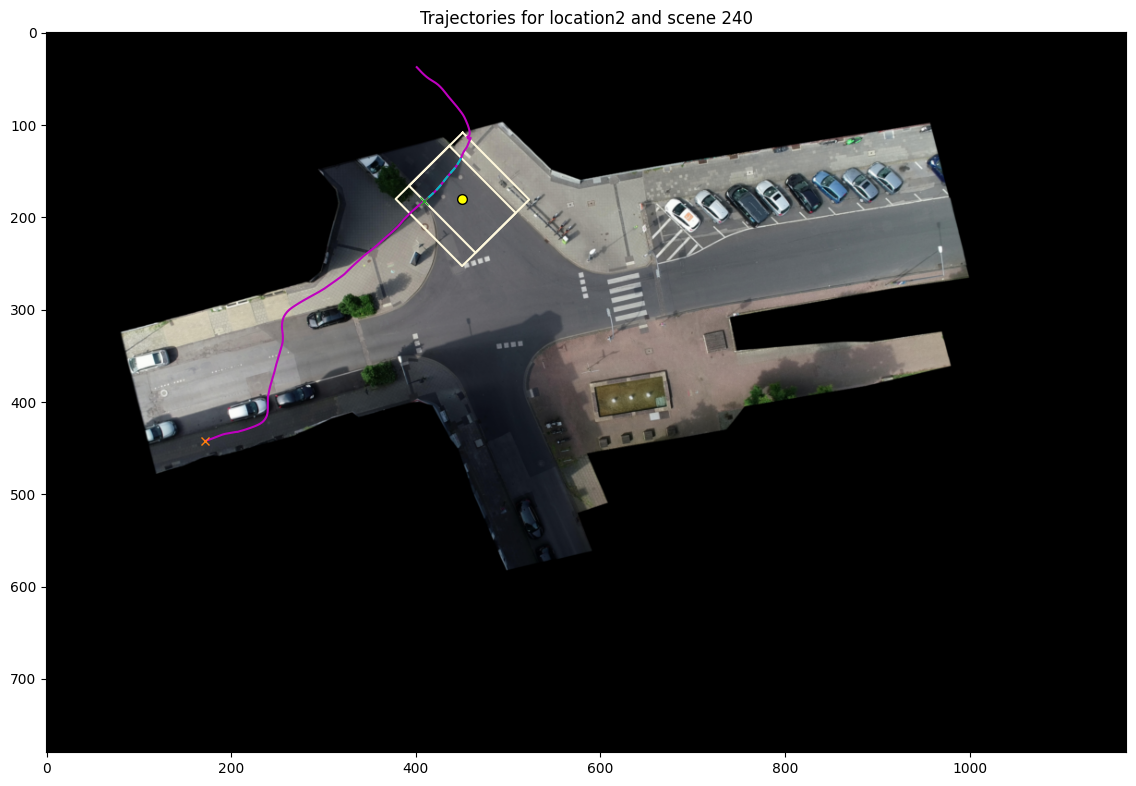

In [57]:

visualizer.showLocationSceneData(sceneData, onlyClipped=False, showOthers=False, ids=[27530001])